<a href="https://colab.research.google.com/github/Hameon4/Tensorflow-2.0-Practice/blob/main/LAB_1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# Load in the data 
df = pd.read_csv('/content/exfil_monogram.csv')

In [5]:
df

,epoll_pwait,futex,getuid,ioctl,read,mprotect,write,clock_gettime,madvise,writev,...,personality,set_tls,capget,fstatfs64,getegid32,getgid32,getgroups32,ptrace,setsid,Label
0,248,102,295,187,36,29,115,12,104,37,...,0,0,0,0,0,0,0,0,0,0
1,423,217,393,253,104,31,317,13,17,38,...,0,0,0,0,0,0,0,0,0,0
2,31,18,58,83,4,1,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,31,20,60,85,4,2,9,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,31,19,64,96,4,2,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6136,61,103,0,35,48,12,70,1019,1,5,...,0,0,0,0,0,0,0,0,0,1
6137,2,33,1,1,3,15,2,0,2,0,...,0,0,0,0,0,0,0,0,0,1
6138,158,80,0,199,71,21,85,1146,4,10,...,0,0,0,0,0,0,0,0,0,1
6139,52,12,0,26,13,5,38,291,1,5,...,0,0,0,0,0,0,0,0,0,1


In [6]:
X = df.drop(columns = ['Label']).copy()
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#Validation SPlit
X_valid, X__sub_test, y_valid, y_sub_test = train_test_split(X_test,y_test, test_size=0.5)

In [7]:
D = df.shape

In [14]:
# 2 - Build/Instantiate the model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(120, 1)),
  tf.keras.layers.Conv1D(1, 70, 5),
  tf.keras.layers.MaxPool1D(),
  tf.keras.layers.Flatten(name='regions'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 11, 1)             71        
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 1)             0         
 1D)                                                             
                                                                 
 regions (Flatten)           (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Train the model 
r = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=25)

Epoch 1/25
154/154 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.9210 - val_loss: 0.3050 - val_accuracy: 0.9202
Epoch 2/25
154/154 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.9175 - val_loss: 0.2508 - val_accuracy: 0.9007
Epoch 3/25
154/154 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.9202 - val_loss: 0.3417 - val_accuracy: 0.9055
Epoch 4/25
154/154 [==============================] - 0s 2ms/step - loss: 0.2524 - accuracy: 0.9247 - val_loss: 0.2275 - val_accuracy: 0.9186
Epoch 5/25
154/154 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.9216 - val_loss: 0.1963 - val_accuracy: 0.9235
Epoch 6/25
154/154 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9361 - val_loss: 0.2110 - val_accuracy: 0.9300
Epoch 7/25
154/154 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.9344 - val_loss: 0.2074 - val_accuracy: 0.9365
Epoch 

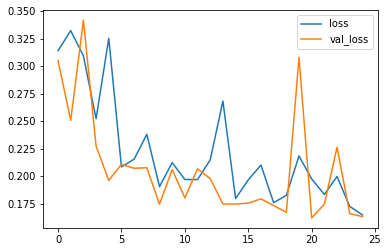

In [19]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

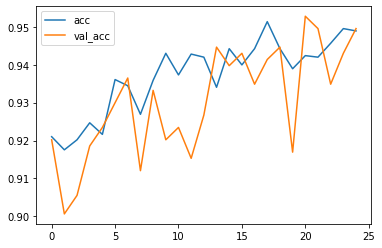

In [20]:
# Plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [21]:
#  evaluate
print(model.evaluate(X_valid, y_valid))

20/20 [==============================] - 0s 1ms/step - loss: 0.1635 - accuracy: 0.9495
[0.1635097861289978, 0.9495114088058472]


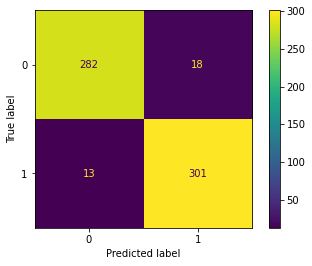






The accuracy is: 0.9495114006514658
The precision is: 0.9435736677115988
The recall is: 0.9585987261146497
The f1 score is: 0.9510268562401264


In [22]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

p_test = model.predict(X_valid) > 0.5 # if less, benign, and malign vice versa
cm = confusion_matrix(y_valid, p_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Print details
print('\n\n\n\n')
print(f'The accuracy is: {accuracy_score(y_valid, p_test)}')
print(f'The precision is: {precision_score(y_valid, p_test, zero_division=1)}')
print(f'The recall is: {recall_score(y_valid, p_test)}')
print(f'The f1 score is: {f1_score(y_valid, p_test)}')

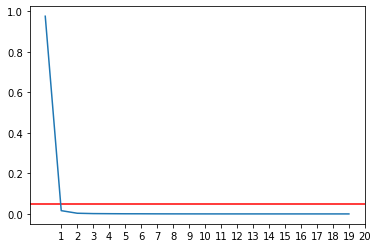

In [23]:
# Dimensionality reduction with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca.fit(X_valid)
plt.axhline(y=0.05, color='r', linestyle='-')
plt.plot(pca.explained_variance_ratio_);
plt.xticks(np.arange(1, 21));

Number of features of the 95% explained variance is 1